In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('bankloans.csv')
print(df.head())

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0


In [3]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [4]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Name: count, Length: 700, dtype: int64

In [5]:
df=df.dropna()

In [6]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [7]:
X=df.drop(['default'],axis=1)
y=df['default']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
sca=StandardScaler()
xtrain=sca.fit_transform(X_train)
xtest=sca.fit_transform(X_test)

In [10]:
rfc_model=RandomForestClassifier(n_estimators=100)

In [11]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
rfc_pred = rfc_model.predict(X_test)

In [13]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

xgb_model = XGBClassifier(eval_metric="logloss")

In [14]:
xgb_model.fit(X_train_np, y_train_np)
xgb_pred = xgb_model.predict(X_test_np)

In [15]:
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfc_pred))

Random Forest Classifier
Accuracy: 0.7928571428571428


In [16]:
print("Classification Report:\n", classification_report(y_test, rfc_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       102
         1.0       0.70      0.42      0.52        38

    accuracy                           0.79       140
   macro avg       0.75      0.68      0.70       140
weighted avg       0.78      0.79      0.77       140



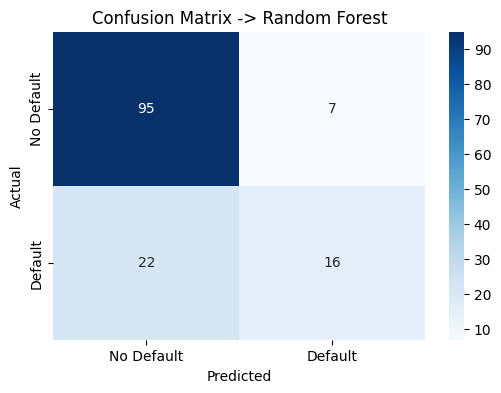

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
rfc_cm = confusion_matrix(y_test, rfc_pred)   # Random Forest
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rfc_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -> Random Forest")
plt.show()

In [18]:
print(" XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))

 XGBoost Classifier:
Accuracy: 0.7714285714285715


In [19]:
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       102
         1.0       0.62      0.39      0.48        38

    accuracy                           0.77       140
   macro avg       0.71      0.65      0.67       140
weighted avg       0.75      0.77      0.75       140



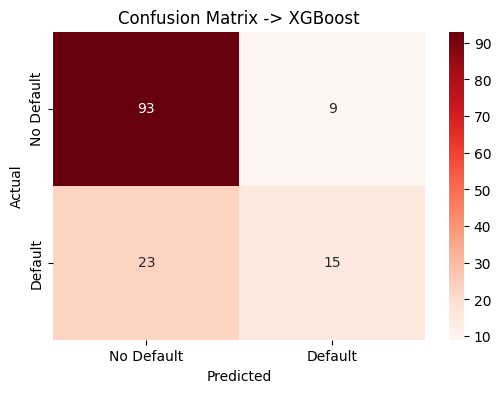

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -> XGBoost")
plt.show()

In [21]:
cv_scores_rfc = cross_val_score(rfc_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Random Forest Classifier CV Scores:", cv_scores_rfc)
print("Random Forest Classifier Average CV Score:", cv_scores_rfc.mean())

Random Forest Classifier CV Scores: [0.77678571 0.8125     0.80357143 0.75       0.75892857]
Random Forest Classifier Average CV Score: 0.7803571428571429


In [22]:
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("XGBoost CV Scores:", cv_scores_xgb)
print("XGBoost Average CV Score:", cv_scores_xgb.mean())

XGBoost CV Scores: [0.78571429 0.77678571 0.79464286 0.75       0.73214286]
XGBoost Average CV Score: 0.7678571428571429


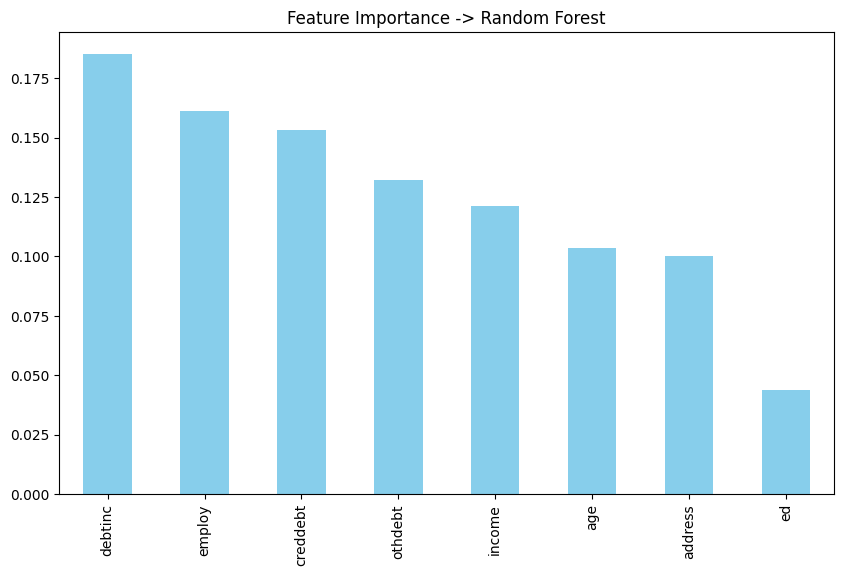

In [23]:
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rfc_model.feature_importances_, index=df.drop('default', axis=1).columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance -> Random Forest")
plt.show()

In [24]:
import joblib

joblib.dump(rfc_model, "credit_risk_model.pkl")
print("Model saved successfully!")


Model saved successfully!
